In [15]:
import pickle
import pandas as pd 
import numpy as np 
# Shared folder to read data
SHARED_FOLDER = './yelp'

# Your folder to write new data and create notebooks.
MY_FOLDER = './output'

In [16]:
with open ('{}/business_review_tip_checkin_df.pickle'.format(SHARED_FOLDER), 'rb') as f:
    business_df = pickle.load(f)
#business_df=pd.read_csv('{}/more_business.csv'.format(SHARED_FOLDER))
#business_df

In [17]:
#del business_df['attributes.AgesAllowed']
#del business_df['avg_review_stars']

In [18]:
import xgboost as xgb
import operator

In [19]:
#train=business_review_tip_checkin_df.columns[5]
features = list(business_df.columns[6:116])
X = business_df[features]
del X['stars']
#del X['reviews_count']
#del X['avg_review_stars']
X

,longitude,open,review_count,categories_Fastfood,categories_Sandwiches,categories_Pizza,categories_Vegetarian,categories_Barbeque,categories_Tex-Mex,Automotive,...,hours.Thursday.close,hours.Thursday.open,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,avg_review_stars,reviews_count,tip_count,checkin_count
0,-111.925847,False,23,0,0,1,0,0,0,0,...,25,25,25,25,25,25,2.391304,23,3,10
1,-112.089834,False,216,0,0,0,1,0,0,0,...,16,7,16,7,16,7,4.216080,199,45,620
2,-111.974607,False,31,0,0,0,0,1,0,0,...,25,25,25,25,25,25,2.300000,30,7,22
3,-111.926294,True,46,0,0,0,0,0,1,0,...,25,25,25,25,25,25,3.500000,46,9,150
4,-111.785500,True,5,1,0,0,0,0,1,0,...,22,10,22,10,22,10,2.600000,5,7,55
5,-112.117920,True,6,0,0,0,0,0,0,1,...,0,0,0,0,0,0,4.200000,5,2,124
6,-111.945569,True,29,1,0,0,0,0,0,0,...,25,25,25,25,25,25,3.666667,27,15,178
7,-111.966734,False,62,0,0,0,0,0,0,0,...,25,25,25,25,25,25,4.338710,62,15,171
8,-111.686889,True,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2.875000,8,3,35
9,-112.073327,True,85,0,0,0,0,0,0,0,...,2,11,1,11,1,11,2.756410,78,30,357


In [20]:
y =business_df['stars']
y

0      2.5
1      4.5
2      2.5
3      3.5
4      2.5
5      4.5
6      3.5
7      4.5
8      3.0
9      2.5
10     2.5
11     3.5
12     4.0
13     3.0
14     3.0
15     4.0
16     3.5
17     4.0
18     2.5
19     4.0
20     2.5
21     3.0
22     4.5
23     4.0
24     4.5
25     3.5
26     1.5
27     4.0
28     4.5
29     4.0
      ... 
152    2.0
153    3.5
154    3.5
155    2.5
156    4.0
157    2.5
158    2.5
159    3.0
160    3.0
161    3.0
162    1.0
163    3.5
164    3.0
165    3.5
166    3.0
167    3.5
168    3.0
169    3.5
170    1.5
171    3.0
172    3.0
173    3.5
174    4.5
175    4.0
176    2.0
177    3.0
178    1.5
179    4.5
180    4.5
181    3.0
Name: stars, dtype: float64

In [21]:
xgb_params = {'booster':'gbtree','objective': 'reg:linear', "eta": 0.05, "max_depth": 5,  "silent": 0,"colsample_bytree":0.7}
'''
xgb_params = {
    'booster': 'gbtree',
    'objective': 'reg:gamma',
    'gamma': 0.2,
    'max_depth': 7,
    'lambda': 4,
    'subsample': 1,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.05,
    'seed': 1000,
}
'''
num_rounds = 1000
dtrain = xgb.DMatrix(X, label=y)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
#dtest = xgb.DMatrix(X_test)
#ans = gbdt.predict(dtest)
print (importance)
#do_metrics(y_test, ans)

[('longitude', 1601), ('avg_review_stars', 1122), ('review_count', 687), ('checkin_count', 684), ('tip_count', 317), ('hours.Friday.close', 249), ('reviews_count', 211), ('open', 145), ('attributes.OutdoorSeating', 123), ('hours.Monday.close', 121), ('attributes.PriceRange', 120), ('attributes.Alcohol', 117), ('hours.Tuesday.close', 111), ('attributes.Ambience.casual', 91), ('hours.Saturday.close', 90), ('categories_Tex-Mex', 89), ('hours.Sunday.close', 88), ('attributes.WiFi', 86), ('attributes.DriveThru', 86), ('attributes.Attire', 84), ('hours.Friday.open', 82), ('attributes.NoiseLevel', 77), ('attributes.WheelchairAccessible', 76), ('categories_American_Traditional', 70), ('attributes.Caters', 70), ('attributes.Delivery', 69), ('categories_Sandwiches', 66), ('categories_Restaurants', 56), ('attributes.GoodFor.dinner', 55), ('attributes.GoodForGroups', 54), ('hours.Thursday.close', 53), ('categories_American_New', 49), ('attributes.TakesReservations', 48), ('attributes.GoodFor.break

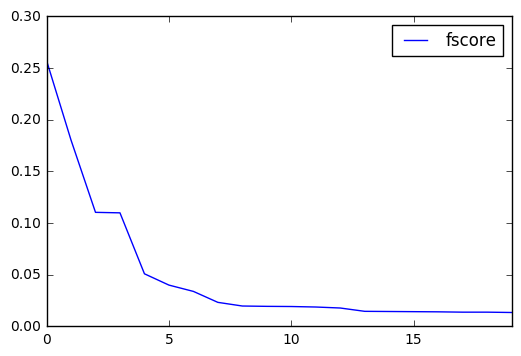

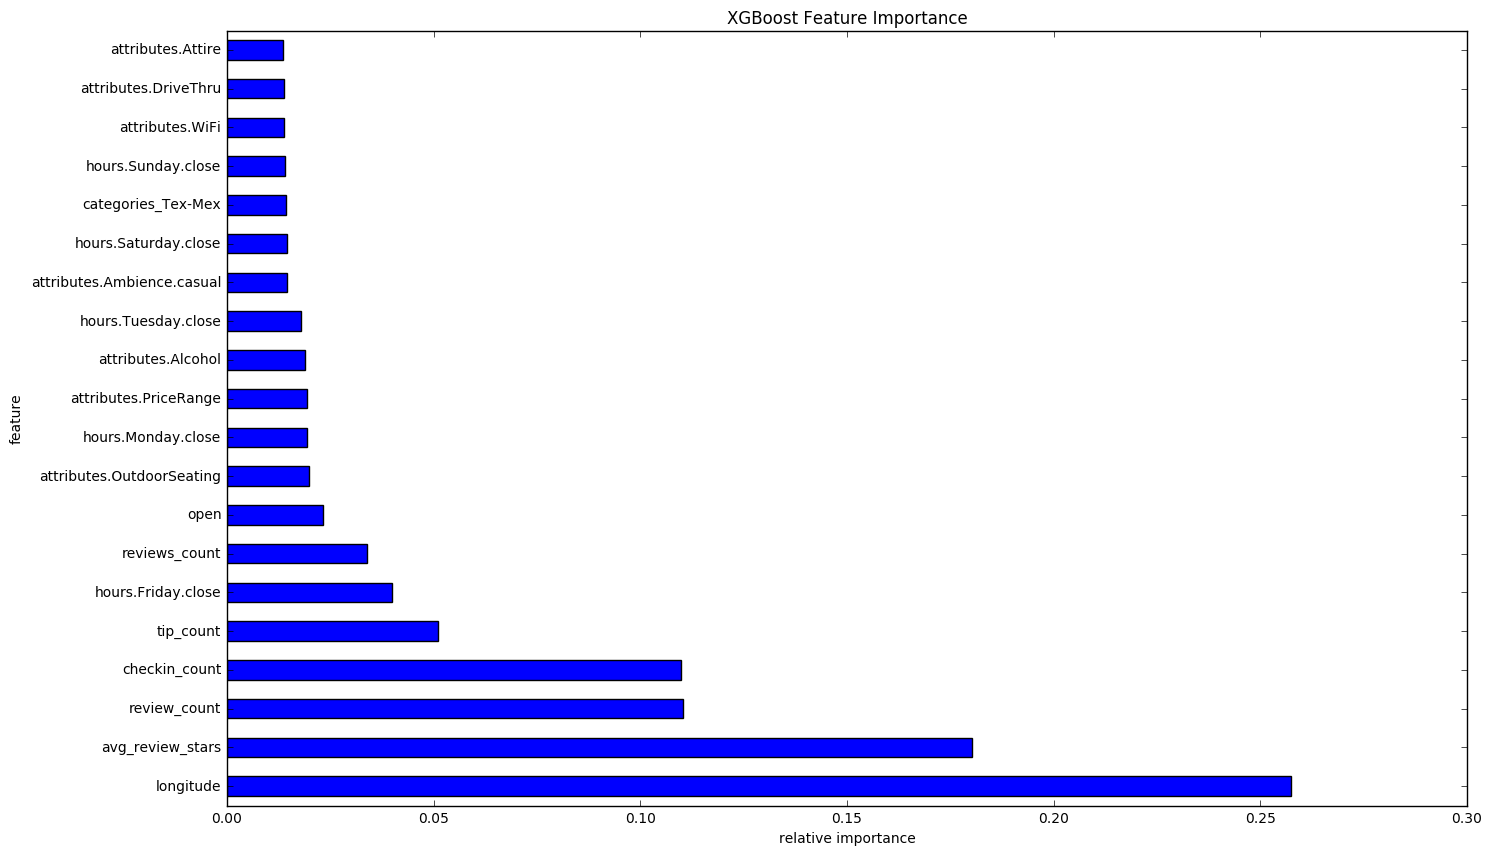

In [22]:
from matplotlib import pylab as plt
all_df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df = pd.DataFrame(importance, columns=['feature', 'fscore']).head(20)
df['fscore'] = df['fscore'] / df['fscore'].sum()
plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')
plt.show()

In [23]:
all_df['feature'].head(40).tolist()


['longitude',
 'avg_review_stars',
 'review_count',
 'checkin_count',
 'tip_count',
 'hours.Friday.close',
 'reviews_count',
 'open',
 'attributes.OutdoorSeating',
 'hours.Monday.close',
 'attributes.PriceRange',
 'attributes.Alcohol',
 'hours.Tuesday.close',
 'attributes.Ambience.casual',
 'hours.Saturday.close',
 'categories_Tex-Mex',
 'hours.Sunday.close',
 'attributes.WiFi',
 'attributes.DriveThru',
 'attributes.Attire',
 'hours.Friday.open',
 'attributes.NoiseLevel',
 'attributes.WheelchairAccessible',
 'categories_American_Traditional',
 'attributes.Caters',
 'attributes.Delivery',
 'categories_Sandwiches',
 'categories_Restaurants',
 'attributes.GoodFor.dinner',
 'attributes.GoodForGroups',
 'hours.Thursday.close',
 'categories_American_New',
 'attributes.TakesReservations',
 'attributes.GoodFor.breakfast',
 'categories_Chinese',
 'categories_Fastfood',
 'attributes.Parking.lot',
 'categories_Pizza',
 'attributes.Ambience.divey',
 'hours.Monday.open']

In [24]:
X = business_df[all_df['feature'].head(50).tolist()]
#del X['stars']
#del X['reviews_count']
#del X['avg_review_stars']
X

,longitude,avg_review_stars,review_count,checkin_count,tip_count,hours.Friday.close,reviews_count,open,attributes.OutdoorSeating,hours.Monday.close,...,categories_Italian,categories_Steakhouses,hours.Wednesday.close,attributes.Ambience.hipster,categories_CoffeeTea,attributes.GoodFor.lunch,attributes.WaiterService,attributes.GoodFor.latenight,attributes.GoodFor.brunch,attributes.BYOB
0,-111.925847,2.391304,23,10,3,25,23,False,0,25,...,0,0,25,0,0,1,0,1,0,2
1,-112.089834,4.216080,216,620,45,16,199,False,1,16,...,0,0,16,0,0,0,1,0,1,2
2,-111.974607,2.300000,31,22,7,25,30,False,1,25,...,0,0,25,2,0,0,1,0,0,2
3,-111.926294,3.500000,46,150,9,25,46,True,1,25,...,0,0,25,0,0,0,0,0,1,2
4,-111.785500,2.600000,5,55,7,23,5,True,1,22,...,0,0,22,2,0,2,0,2,2,2
5,-112.117920,4.200000,6,124,2,0,5,True,2,0,...,0,0,0,2,0,2,2,2,2,2
6,-111.945569,3.666667,29,178,15,25,27,True,0,25,...,0,0,25,0,0,0,0,0,1,2
7,-111.966734,4.338710,62,171,15,25,62,False,1,25,...,0,0,25,2,1,1,0,0,0,2
8,-111.686889,2.875000,10,35,3,0,8,True,2,0,...,0,0,0,2,0,2,2,2,2,2
9,-112.073327,2.756410,85,357,30,2,78,True,0,1,...,0,1,1,0,0,0,1,1,0,2


In [25]:
from sklearn import cross_validation, metrics
xgb_params = {'booster':'gbtree','objective': 'reg:linear', "eta": 0.01, "max_depth": 5,  "silent": 0,"colsample_bytree":0.8}
num_rounds = 1000
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)
dtrain = xgb.DMatrix(X_train, label=y_train)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
dtest = xgb.DMatrix(X_test)
ans = gbdt.predict(dtest)

((array([-2.24067415, -1.87510362, -1.66006004, -1.50227431, -1.37493955,
         -1.26666782, -1.17149966, -1.08590302, -1.00760151, -0.93503607,
         -0.86708833, -0.80292598, -0.74191073, -0.68354056, -0.62741195,
         -0.5731943 , -0.52061206, -0.4694319 , -0.41945333, -0.37050163,
         -0.32242247, -0.27507767, -0.22834187, -0.18209983, -0.13624414,
         -0.0906733 , -0.04529008,  0.        ,  0.04529008,  0.0906733 ,
          0.13624414,  0.18209983,  0.22834187,  0.27507767,  0.32242247,
          0.37050163,  0.41945333,  0.4694319 ,  0.52061206,  0.5731943 ,
          0.62741195,  0.68354056,  0.74191073,  0.80292598,  0.86708833,
          0.93503607,  1.00760151,  1.08590302,  1.17149966,  1.26666782,
          1.37493955,  1.50227431,  1.66006004,  1.87510362,  2.24067415]),
  array([-0.73435163, -0.70982409, -0.52919316, -0.52151656, -0.51110744,
         -0.49700594, -0.45593047, -0.43881226, -0.35528839, -0.34769106,
         -0.24432826, -0.13700199, -

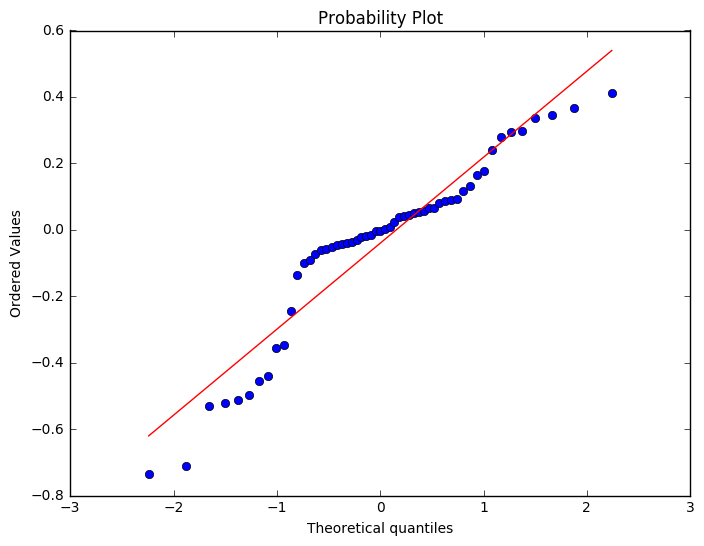

In [26]:
%matplotlib inline
from scipy.stats import probplot
f = plt.figure(figsize=(8, 6))
ax = f.add_subplot(111)
probplot(y_test - ans, plot=ax)

In [27]:
r_square=metrics.r2_score(y_test, ans, sample_weight=None, multioutput='uniform_average')
r_square

0.91854488349962427

In [28]:
metrics.mean_squared_error(y_test, ans)

0.070212964057761895